In [110]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from crate_graph import crate_graph

   Source  Destination  weight
0       0            1      18
1       0            3      14
2       0            4       9
3       0            7      15
4       0            8       3


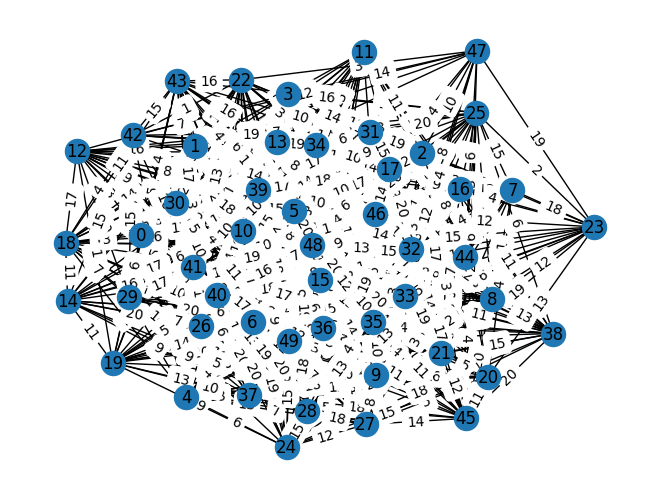

Graph recreated successfully!
The graph has 50 node.


In [111]:
G= crate_graph("graph_data_with_weights.xlsx")
num_nodes = G.number_of_nodes()
print (f"Graph recreated successfully!")
print (f"The graph has {num_nodes} node.")

In [112]:
#initail Q table and Reward table
Q=np.matrix(np.zeros(shape=(num_nodes,num_nodes)))
Q-=100

In [113]:
goal_state= int(input("enter goal state:"))

In [114]:
#calculate the reward
def calculate_reward(state, next_state, graph):
    if next_state == goal_state:
        return 1000
    elif graph.has_edge(state, next_state):
        weight = graph[state][next_state]['weight']
        return -(1/weight)
    
    else:
        return -1000

In [115]:
def next_number(start, er):
    random_value = random.uniform(0, 1)
    if random_value < er:
        sample = list(G[start])
    else:
        sample = np.where(Q[start, ].A1 == np.max(Q[start, ].A1))[0]
    next_node = int(np.random.choice(sample))
    return next_node

In [116]:
def updateQ(node1, node2, lr, discount):
    max_index = np.where(Q[node2, ].A1 == np.max(Q[node2, ].A1))[0]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[node2, max_index]
    reward = calculate_reward(node1, node2, G)
    Q[node1, node2] = (1 - lr) * Q[node1, node2] + lr * (reward + discount * max_value)


In [117]:
def learn(er, lr, discount):
    for i in range(5000):
        start = np.random.randint(0, num_nodes)
        next_node = next_number(start, er)
        updateQ(start, next_node, lr, discount)

In [118]:
while True:
    exploration_rate = float(input("Enter the exploration rate (0.0 - 1.0): "))
    learning_rate = float(input("Enter the learning rate (0.0 - 1.0): "))
    discount_rate = float(input("Enter the discount rate (0.0 - 1.0): "))
    if 0.0 <= exploration_rate <= 1.0 and 0.0 <= learning_rate <= 1.0 and 0.0 <= discount_rate <= 1.0:
        break

learn(exploration_rate, learning_rate, discount_rate)
print("learn completed!")

learn completed!


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13480\495685761.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size=1))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13480\495685761.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)


In [119]:
def shortest_path(begin, end):
    path = [begin]
    next_node = np.argmax(Q[begin, ].A1)
    path.append(next_node)
    while next_node != end:
        next_node = np.argmax(Q[next_node, ].A1)
        path.append(next_node)
    return path

In [126]:
print(shortest_path(0, 10))

[[-100.         -100.         -886.432      ... -100.
  -100.         -100.        ]
 [-100.         -100.         -100.         ... 4244.86315252
  -100.         4175.86059139]
 [-100.         -100.         -100.         ... -100.
  -100.         -100.        ]
 ...
 [-100.          -68.7362579  3497.15630244 ... -100.
  -100.         -100.        ]
 [-100.         -100.         -100.         ... -100.
  -100.         -100.        ]
 [-100.         -100.         -100.         ... -100.
  -100.         -100.        ]]


TypeError: 'list' object is not callable

In [121]:
# print(Q[0, 225])

In [122]:
shortest_path = nx.dijkstra_path(G, 0, goal_state, weight='weight')
print(shortest_path)


[0, 43, 49]


In [123]:
print(Q[0, 49])

-100.0


In [124]:
print(G[0][43]["weight"])
print(G[43][49]["weight"])
print(G[0][4]["weight"])
print(G[4][40]["weight"])
print(G[40][49]["weight"])

4
1
9
15
18


In [125]:
for i in range(x):
    next = x[i+1]
    print(G[i][next]["weight"])

NameError: name 'x' is not defined